# Lung Cancer Subtyping
a mathematical model that can discriminate between two lung cancer subtypes to build the model 
we use an unsupervised k-means clustering algorithm (Euclidean distance) of 58 NSCLC tumors using k=2

data from: 

https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE10245

[GSE10245_family.soft.gz](https://ftp.ncbi.nlm.nih.gov/geo/series/GSE10nnn/GSE10245/soft/)

40 AC 18 SC


In [8]:
# load the data using the GEOparse module
# code adapted from: https://geoparse.readthedocs.io/en/latest/usage.html

import GEOparse
gse = GEOparse.get_GEO(filepath="./GSE10245_family.soft.gz")

22-Nov-2023 11:44:44 INFO GEOparse - Parsing ./GSE10245_family.soft.gz: 
22-Nov-2023 11:44:44 DEBUG GEOparse - DATABASE: GeoMiame
22-Nov-2023 11:44:44 DEBUG GEOparse - SERIES: GSE10245
22-Nov-2023 11:44:44 DEBUG GEOparse - PLATFORM: GPL570
/Users/ymanasa/anaconda3/lib/python3.11/site-packages/GEOparse/GEOparse.py:401: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  return read_csv(StringIO(data), index_col=None, sep="\t")
22-Nov-2023 11:44:45 DEBUG GEOparse - SAMPLE: GSM258551
22-Nov-2023 11:44:46 DEBUG GEOparse - SAMPLE: GSM258552
22-Nov-2023 11:44:46 DEBUG GEOparse - SAMPLE: GSM258553
22-Nov-2023 11:44:46 DEBUG GEOparse - SAMPLE: GSM258554
22-Nov-2023 11:44:46 DEBUG GEOparse - SAMPLE: GSM258555
22-Nov-2023 11:44:46 DEBUG GEOparse - SAMPLE: GSM258556
22-Nov-2023 11:44:46 DEBUG GEOparse - SAMPLE: GSM258557
22-Nov-2023 11:44:46 DEBUG GEOparse - SAMPLE: GSM258558
22-Nov-2023 11:44:46 DEBUG GEOparse - SAMPLE: GSM258559
22-Nov-2023 11:4

In [9]:
import pandas as pd

In [10]:
# gse.gsms is a dict 
print(gse.gsms.items())
for gsm_name, gsm in gse.gsms.items():
# gsm is a GEOparse `object <class 'GEOparse.GEOTypes.GSM'>`
# gsm has metadata attribute 
    print(gsm.metadata.items())
    
# print( gse.gsms.items())

dict_items([('GSM258551', <SAMPLE: GSM258551>), ('GSM258552', <SAMPLE: GSM258552>), ('GSM258553', <SAMPLE: GSM258553>), ('GSM258554', <SAMPLE: GSM258554>), ('GSM258555', <SAMPLE: GSM258555>), ('GSM258556', <SAMPLE: GSM258556>), ('GSM258557', <SAMPLE: GSM258557>), ('GSM258558', <SAMPLE: GSM258558>), ('GSM258559', <SAMPLE: GSM258559>), ('GSM258560', <SAMPLE: GSM258560>), ('GSM258561', <SAMPLE: GSM258561>), ('GSM258562', <SAMPLE: GSM258562>), ('GSM258563', <SAMPLE: GSM258563>), ('GSM258564', <SAMPLE: GSM258564>), ('GSM258565', <SAMPLE: GSM258565>), ('GSM258566', <SAMPLE: GSM258566>), ('GSM258567', <SAMPLE: GSM258567>), ('GSM258568', <SAMPLE: GSM258568>), ('GSM258569', <SAMPLE: GSM258569>), ('GSM258570', <SAMPLE: GSM258570>), ('GSM258571', <SAMPLE: GSM258571>), ('GSM258572', <SAMPLE: GSM258572>), ('GSM258573', <SAMPLE: GSM258573>), ('GSM258574', <SAMPLE: GSM258574>), ('GSM258575', <SAMPLE: GSM258575>), ('GSM258576', <SAMPLE: GSM258576>), ('GSM258577', <SAMPLE: GSM258577>), ('GSM258578', <S

In [12]:
# getting expression data from gse object as a dataframe 
expr = pd.DataFrame(gse.pivot_samples('VALUE'))
expr.head()

name,GSM258551,GSM258552,GSM258553,GSM258554,GSM258555,GSM258556,GSM258557,GSM258558,GSM258559,GSM258560,...,GSM258599,GSM258600,GSM258601,GSM258602,GSM258603,GSM258604,GSM258605,GSM258606,GSM258607,GSM258608
ID_REF,,,,,,,,,,,,,,,,,,,,,
1007_s_at,9.129905,9.843349,9.730661,9.032165,10.281793,9.154551,8.063788,8.881805,9.039005,10.643545,...,9.628212,10.130757,9.276419,9.296957,10.346701,9.709068,7.672985,9.199080,7.635765,8.760082
1053_at,8.034022,7.973332,8.834045,7.723965,9.040800,8.792375,8.093354,7.575620,8.438594,9.142260,...,9.215567,8.273698,8.790710,8.861625,8.512193,7.908581,9.299454,8.220959,7.432135,7.596431
117_at,3.564520,4.994852,5.066018,4.958580,4.951835,6.428274,7.364676,4.659326,6.643723,5.368356,...,5.183919,4.801579,6.161777,5.443126,4.609810,4.339004,6.384404,6.006534,5.484470,5.372583
121_at,4.746490,5.197306,5.234618,6.078180,5.205632,5.009848,5.533000,5.362637,5.210988,5.195820,...,5.202508,4.807654,5.326347,5.205004,5.201123,6.028717,5.220915,5.186452,5.220778,5.097535
1255_g_at,2.320698,2.248520,2.259504,2.262787,2.207531,2.322618,2.656929,2.255955,2.266399,2.246563,...,2.248392,2.232021,2.246738,2.245739,2.265454,2.301397,2.322604,2.236494,2.243698,2.420731


In [13]:
# gpls attribute of gse 
print(gse.gpls.items())
for gpl_name, gpl in gse.gpls.items():
    print(gpl.table.head())


dict_items([('GPL570', <d: GPL570>)])
          ID  GB_ACC SPOT_ID Species Scientific Name Annotation Date  \
0  1007_s_at  U48705     NaN            Homo sapiens     Oct 6, 2014   
1    1053_at  M87338     NaN            Homo sapiens     Oct 6, 2014   
2     117_at  X51757     NaN            Homo sapiens     Oct 6, 2014   
3     121_at  X69699     NaN            Homo sapiens     Oct 6, 2014   
4  1255_g_at  L36861     NaN            Homo sapiens     Oct 6, 2014   

       Sequence Type                  Sequence Source  \
0  Exemplar sequence  Affymetrix Proprietary Database   
1  Exemplar sequence                          GenBank   
2  Exemplar sequence  Affymetrix Proprietary Database   
3  Exemplar sequence                          GenBank   
4  Exemplar sequence  Affymetrix Proprietary Database   

                                  Target Description Representative Public ID  \
0  U48705 /FEATURE=mRNA /DEFINITION=HSU48705 Huma...                   U48705   
1  M87338 /FEATURE= /DEF

In [14]:
gpl.table.head()

,ID,GB_ACC,SPOT_ID,Species Scientific Name,Annotation Date,Sequence Type,Sequence Source,Target Description,Representative Public ID,Gene Title,Gene Symbol,ENTREZ_GENE_ID,RefSeq Transcript ID,Gene Ontology Biological Process,Gene Ontology Cellular Component,Gene Ontology Molecular Function
0,1007_s_at,U48705,NaN,Homo sapiens,"Oct 6, 2014",Exemplar sequence,Affymetrix Proprietary Database,U48705 /FEATURE=mRNA /DEFINITION=HSU48705 Huma...,U48705,discoidin domain receptor tyrosine kinase 1 //...,DDR1 /// MIR4640,780 /// 100616237,NM_001202521 /// NM_001202522 /// NM_001202523...,0001558 // regulation of cell growth // inferr...,0005576 // extracellular region // inferred fr...,0000166 // nucleotide binding // inferred from...
1,1053_at,M87338,NaN,Homo sapiens,"Oct 6, 2014",Exemplar sequence,GenBank,M87338 /FEATURE= /DEFINITION=HUMA1SBU Human re...,M87338,"replication factor C (activator 1) 2, 40kDa",RFC2,5982,NM_001278791 /// NM_001278792 /// NM_001278793...,0000278 // mitotic cell cycle // traceable aut...,0005634 // nucleus // inferred from electronic...,0000166 // nucleotide binding // inferred from...
2,117_at,X51757,NaN,Homo sapiens,"Oct 6, 2014",Exemplar sequence,Affymetrix Proprietary Database,X51757 /FEATURE=cds /DEFINITION=HSP70B Human h...,X51757,heat shock 70kDa protein 6 (HSP70B'),HSPA6,3310,NM_002155,0000902 // cell morphogenesis // inferred from...,0005737 // cytoplasm // inferred from direct a...,0000166 // nucleotide binding // inferred from...
3,121_at,X69699,NaN,Homo sapiens,"Oct 6, 2014",Exemplar sequence,GenBank,X69699 /FEATURE= /DEFINITION=HSPAX8A H.sapiens...,X69699,paired box 8,PAX8,7849,NM_003466 /// NM_013951 /// NM_013952 /// NM_0...,0001655 // urogenital system development // in...,0005634 // nucleus // inferred from direct ass...,0000979 // RNA polymerase II core promoter seq...
4,1255_g_at,L36861,NaN,Homo sapiens,"Oct 6, 2014",Exemplar sequence,Affymetrix Proprietary Database,L36861 /FEATURE=expanded_cds /DEFINITION=HUMGC...,L36861,guanylate cyclase activator 1A (retina),GUCA1A,2978,NM_000409 /// XM_006715073,0007165 // signal transduction // non-traceabl...,0001750 // photoreceptor outer segment // infe...,0005509 // calcium ion binding // inferred fro...


In [15]:
# assinging ID, Gene Symbol, ENTREZ_GENE_ID columns from gpl.table as a pandas dataframe to metadata
metadata = pd.DataFrame(gpl.table, columns=['ID', 'Gene Symbol', 'ENTREZ_GENE_ID'])
metadata

,ID,Gene Symbol,ENTREZ_GENE_ID
0,1007_s_at,DDR1 /// MIR4640,780 /// 100616237
1,1053_at,RFC2,5982
2,117_at,HSPA6,3310
3,121_at,PAX8,7849
4,1255_g_at,GUCA1A,2978
...,...,...,...
54670,AFFX-ThrX-5_at,NaN,NaN
54671,AFFX-ThrX-M_at,NaN,NaN
54672,AFFX-TrpnX-3_at,NaN,NaN
54673,AFFX-TrpnX-5_at,NaN,NaN


In [18]:
# cleanup the data by dropping NaN
metadata.dropna(inplace=True)
metadata

,ID,Gene Symbol,ENTREZ_GENE_ID
0,1007_s_at,DDR1 /// MIR4640,780 /// 100616237
1,1053_at,RFC2,5982
2,117_at,HSPA6,3310
3,121_at,PAX8,7849
4,1255_g_at,GUCA1A,2978
...,...,...,...
54630,AFFX-HUMGAPDH/M33197_M_at,GAPDH,2597
54631,AFFX-HUMISGF3A/M97935_3_at,STAT1,6772
54632,AFFX-HUMISGF3A/M97935_5_at,STAT1,6772
54633,AFFX-HUMISGF3A/M97935_MA_at,STAT1,6772


In [19]:
# merge the gsp and gpl data to remove any duplicates 
# repeating Gene Symbol values can have different IDs: for ex, STAT1 6772 repeats but the ID stays different
# 
merged_meta_expr = pd.merge(metadata,expr, left_on= "ID", right_on="ID_REF")

# arrange mean from largest to smallest so that when we drop duplicates, the first occurance is kepy 
# the first occurance (with highest mean) will be the best one to keep
merged_meta_expr["mean"] = merged_meta_expr.mean(axis="columns")
sorted_merged = merged_meta_expr.sort_values(by=["mean"],ascending=False)
sorted_merged.head()


TypeError: can only concatenate str (not "float") to str

In [ ]:
# dropping the duplicates-- keeping highest mean expression values 
no_dupes = sorted_merged.drop_duplicates("Gene Symbol")

# dropping other unecessary columns 
no_mean_id = no_dupes.drop(["mean", "ID", "ENTREZ_GENE_ID"] ,1)

no_mean_id.head()

/var/folders/gf/79pl6dp1569b76cgzy_9yv7c0000gs/T/ipykernel_43792/3074067731.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  no_mean_id = no_dupes.drop(["mean", "ID", "ENTREZ_GENE_ID"] ,1)


,Gene Symbol,GSM258551,GSM258552,GSM258553,GSM258554,GSM258555,GSM258556,GSM258557,GSM258558,GSM258559,...,GSM258599,GSM258600,GSM258601,GSM258602,GSM258603,GSM258604,GSM258605,GSM258606,GSM258607,GSM258608
914,COX1,15.312190,15.335128,15.147944,15.235262,15.402517,15.235435,15.266640,15.236145,15.530658,...,15.354914,15.495646,15.392720,15.480795,15.372107,15.476776,15.125095,14.820450,15.409687,15.145438
19877,EEF1A1,15.180497,15.180229,15.262090,15.246653,15.272874,15.181830,15.162696,15.126815,15.315813,...,15.165107,15.184177,15.130715,15.191393,15.174592,15.192399,15.167122,15.298337,15.110260,15.088462
26931,IGK /// IGKC,15.394483,15.375848,15.259431,15.250159,11.996869,15.053283,15.450697,15.391052,14.658909,...,15.177085,15.370751,14.985706,14.771899,15.048471,15.236298,14.678163,15.120340,15.349818,15.372265
22263,TMSB4X,15.164475,15.337793,14.886320,14.723359,14.734361,14.755676,15.090716,14.747466,15.357297,...,14.861333,15.184035,14.716383,14.885592,14.950120,14.881242,15.236298,14.600380,15.158579,15.059676
936,ATP6,14.765942,14.939455,14.530669,14.956952,14.960515,14.767122,14.648069,14.847039,14.897657,...,14.963645,15.086318,14.994576,15.079311,14.952733,15.047349,14.124653,14.317633,14.954273,14.737609


In [5]:
# resetting index values by setting Gene Symbol column as index 
reset_index_df= no_mean_id.set_index(["Gene Symbol"])
reset_index_df


NameError: name 'no_mean_id' is not defined

In [1]:
# to plot and cluster
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets._samples_generator import make_blobs


(200, 2)

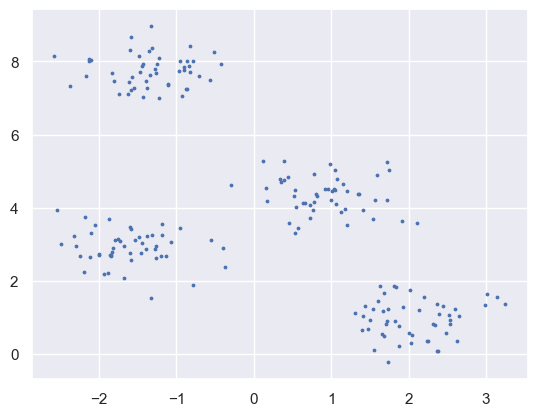

In [2]:
# just simulating and visualizing clustering of synthetic data using make_blobs() from scikit-learn
# just to test how the clustering might look for our data

# number of samples from our dataset 
n_samples = 200
# how many k means clusters should the model make
k_clusters = 4
# Smaller cluster_std: Tighter, more compact clusters.
# Larger cluster_std: More spread out, less compact clusters.
# The choice of cluster_std depends on the characteristics you want in your synthetic data and the specific requirements of your clustering experiment.
cluster_std  = 0.50

# synthetic data made using the info passed into make_blobs() 
X, y_true = make_blobs(n_samples = n_samples, centers = k_clusters, cluster_std = cluster_std, random_state = 0)

# X[:, 0] represents the first feature of the data points (x)
# and X[:, 1] represents the second feature (y)
#  The s=20 parameter specifies the size of the markers in the plot
plt.scatter(X[:, 0], X[:, 1], s = 3);
## plt.show()

X.shape

In [4]:
# columns should be feautures (genes) and rows should be data points (gene expression per sample)
# the model will sepearte the samples (rows) into two clusters based on their features (expression values per gene)
final_df = reset_index_df.T
final_df

## number of rows and columns in our dataframe
#final_df.shape

# .values gives an array of all the values for each feature (for GSM258551 [15.312190, 15.180497, 15.394483...], for GSM258552 [15.33512815, 15.18022902, 15.37584761...], for GSM258553 [15.14794428, 15.26208991, 15.25943145...], ... )
# final_df.values

NameError: name 'reset_index_df' is not defined

In [ ]:
# create a K-Means model with the specified number of clusters'
# n_init is the number of times the K-Means algorithm will be run with different centroid seeds
kmeans = KMeans(n_clusters = 2, n_init=10, random_state = 0)

# fit the model to our data (array for the gene expression values per feature)
kmeans.fit(final_df)

# the number of clusters (2) and the number of features (genes) in our data
kmeans.labels_

NameError: name 'KMeans' is not defined

In [ ]:
# create dataframe with 58 smaple lables as a column, cluster number and cancer type as another column 

# sample label
index_data = final_df.index
cluster_type_df = pd.DataFrame(index_data, columns=['Sample Label'])
cluster_type_df = cluster_type_df.set_index('Sample Label')

# cluster number
cluster_num = kmeans.labels_
cluster_type_df['Cluster Numbers'] = cluster_num

# ac or scc
ac_scc_series = gse.phenotype_data["title"].str.split('_').str[1]
ac_scc_df = ac_scc_series.to_frame('Subtype')

cluster_type_df = cluster_type_df.merge(cluster_type_df, left_index=True, right_index=True)
cluster_type_df


NameError: name 'final_df' is not defined

In [ ]:
# Q8. maybe see and plot which genes have highest expression in AC vs SC cells using plotting we did in session 12